<a href="https://colab.research.google.com/github/Baeltor/PCD/blob/prog/NotebooksMLII/Batch_Epoch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

In [ ]:
from sklearn.datasets import make_blobs


X, y = make_blobs(n_samples=1000,
                  centers=3,
                  n_features=2,
                  cluster_std=1,
                  random_state=2)

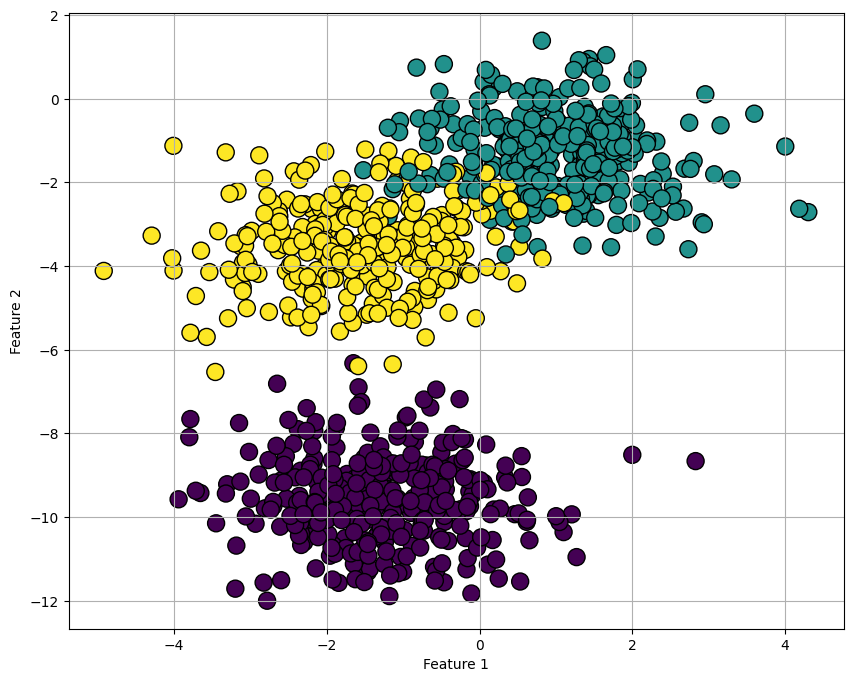

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, edgecolor='black', s=150)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.grid()
plt.show()

In [ ]:
y_encoded = tf.keras.utils.to_categorical(y)
y_encoded

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.5, stratify=y, random_state=42)

In [ ]:
tf.random.set_seed(42)
tf.keras.backend.clear_session()

model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation='relu', kernel_initializer='he_uniform'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#__Batch__

In [ ]:
history_batch = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), batch_size=X_train.shape[0])

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step - accuracy: 0.8000 - loss: 0.4427 - val_accuracy: 0.7900 - val_loss: 0.4730
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 510ms/step - accuracy: 0.8080 - loss: 0.4415 - val_accuracy: 0.7940 - val_loss: 0.4727
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 836ms/step - accuracy: 0.8160 - loss: 0.4411 - val_accuracy: 0.7920 - val_loss: 0.4725
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step - accuracy: 0.8160 - loss: 0.4407 - val_accuracy: 0.7920 - val_loss: 0.4716
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.8160 - loss: 0.4396 - val_accuracy: 0.7960 - val_loss: 0.4704
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 0.8160 - loss: 0.4382 - val_accuracy: 0.7940 - val_loss: 0.4694
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.8060 - loss: 0.4371 - val_accuracy: 0.7940 - val_loss: 0.4690
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.7980 - loss: 0.4365 - val_accuracy: 0.7920 - val_

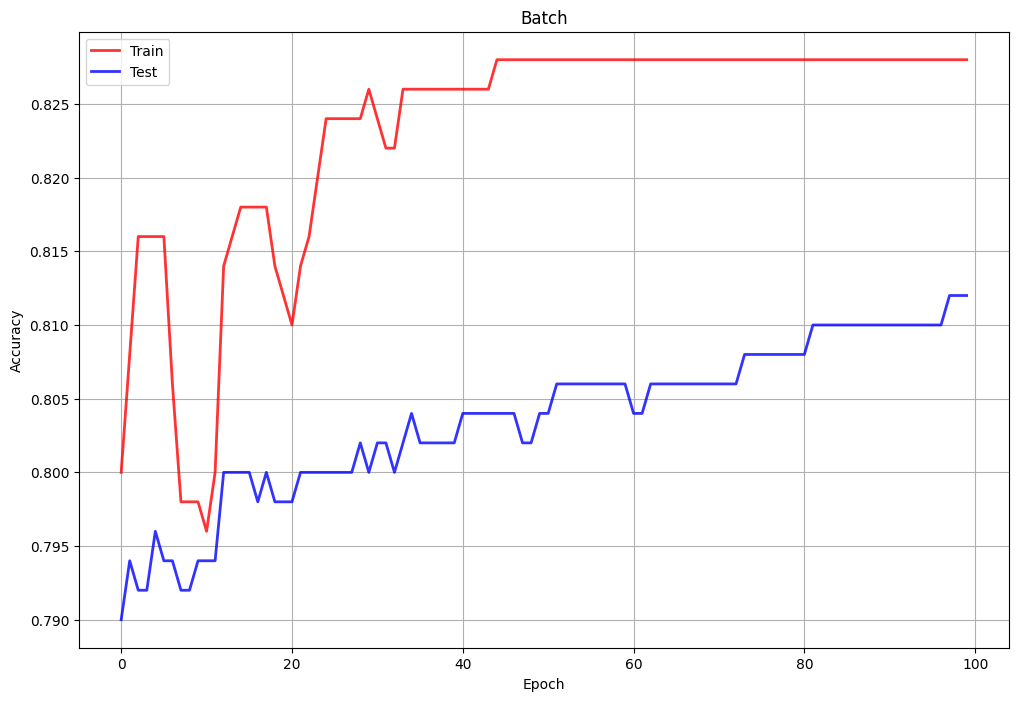

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(history_batch.history['accuracy'], label='Train', c='r', linewidth=2, alpha=0.8)
plt.plot(history_batch.history['val_accuracy'], label='Test', c='b', linewidth=2, alpha=0.8)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Batch')
plt.legend()
plt.grid()
plt.show()

# __SGD__

In [ ]:
tf.random.set_seed(42)
tf.keras.backend.clear_session()

model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation='relu', kernel_initializer='he_uniform'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
              loss='categorical_crossentropy',
              metrics='accuracy')

In [ ]:
history_sgd = model.fit(X_train, y_train, epochs=200, validation_split=0.1, batch_size=1)

Epoch 1/200
450/450 [==============================] - 2s 2ms/step - loss: 1.8908 - accuracy: 0.5289 - val_loss: 0.8545 - val_accuracy: 0.6600
Epoch 2/200
450/450 [==============================] - 1s 2ms/step - loss: 0.9541 - accuracy: 0.5467 - val_loss: 0.9496 - val_accuracy: 0.6800
Epoch 3/200
450/450 [==============================] - 1s 2ms/step - loss: 1.0331 - accuracy: 0.5222 - val_loss: 1.0075 - val_accuracy: 0.5400
Epoch 4/200
450/450 [==============================] - 1s 2ms/step - loss: 0.9504 - accuracy: 0.5578 - val_loss: 0.9431 - val_accuracy: 0.6200
Epoch 5/200
450/450 [==============================] - 1s 2ms/step - loss: 0.9178 - accuracy: 0.5778 - val_loss: 1.0818 - val_accuracy: 0.4800
Epoch 6/200
450/450 [==============================] - 1s 2ms/step - loss: 0.8679 - accuracy: 0.6133 - val_loss: 1.0562 - val_accuracy: 0.5000
Epoch 7/200
450/450 [==============================] - 1s 2ms/step - loss: 0.8890 - accuracy: 0.5733 - val_loss: 0.9015 - val_accuracy: 0.6400

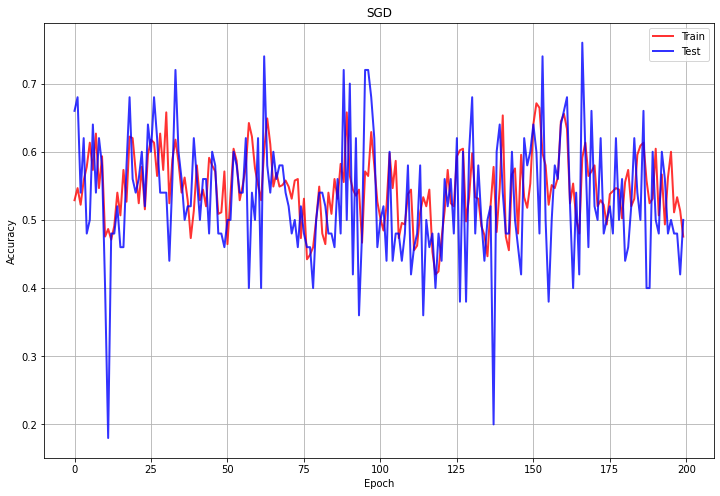

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(history_sgd.history['accuracy'], label='Train', c='r', linewidth=2, alpha=0.8)
plt.plot(history_sgd.history['val_accuracy'], label='Test', c='b', linewidth=2, alpha=0.8)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('SGD')
plt.legend()
plt.grid()
plt.show()

# __Mini-batch__

In [ ]:
tf.random.set_seed(42)
tf.keras.backend.clear_session()

model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation='relu', kernel_initializer='he_uniform'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
              loss='categorical_crossentropy',
              metrics='accuracy')

In [ ]:
history_mini_batch = model.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test), batch_size=32)

Epoch 1/200
16/16 [==============================] - 1s 16ms/step - loss: 2.3497 - accuracy: 0.5500 - val_loss: 2.8614 - val_accuracy: 0.6000
Epoch 2/200
16/16 [==============================] - 0s 5ms/step - loss: 2.6820 - accuracy: 0.5880 - val_loss: 3.3863 - val_accuracy: 0.4680
Epoch 3/200
16/16 [==============================] - 0s 5ms/step - loss: 1.8392 - accuracy: 0.6420 - val_loss: 1.0352 - val_accuracy: 0.5360
Epoch 4/200
16/16 [==============================] - 0s 5ms/step - loss: 0.8224 - accuracy: 0.6620 - val_loss: 0.7675 - val_accuracy: 0.7020
Epoch 5/200
16/16 [==============================] - 0s 7ms/step - loss: 0.6323 - accuracy: 0.7560 - val_loss: 0.5948 - val_accuracy: 0.7640
Epoch 6/200
16/16 [==============================] - 0s 5ms/step - loss: 0.6343 - accuracy: 0.7560 - val_loss: 0.6269 - val_accuracy: 0.6720
Epoch 7/200
16/16 [==============================] - 0s 5ms/step - loss: 0.6134 - accuracy: 0.7480 - val_loss: 0.5584 - val_accuracy: 0.7780
Epoch 8/200


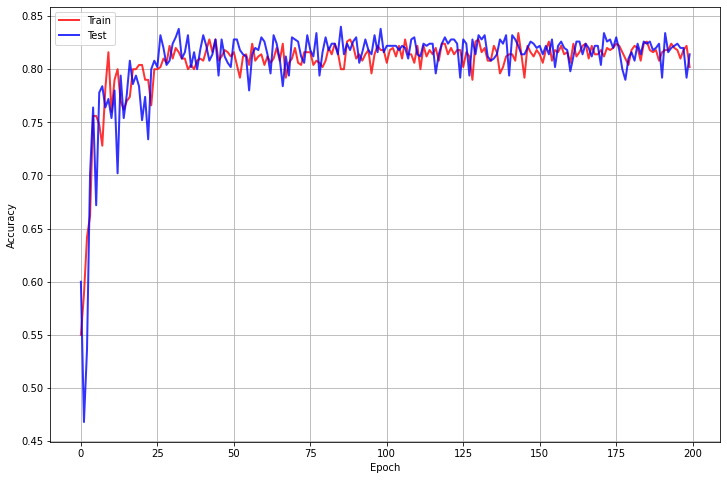

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(history_mini_batch.history['accuracy'], label='Train', c='r', linewidth=2, alpha=0.8)
plt.plot(history_mini_batch.history['val_accuracy'], label='Test', c='b', linewidth=2, alpha=0.8)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('SGD')
plt.legend()
plt.grid()
plt.show()

# __Comparing different batch-sizes__

In [ ]:
def fit_model(X, y, n_batch):

  X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.5, stratify=y, random_state=42)

  tf.random.set_seed(42)
  tf.keras.backend.clear_session()

  model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation='relu', kernel_initializer='he_uniform'),
    tf.keras.layers.Dense(3, activation='softmax')
    ])

  model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
              loss='categorical_crossentropy',
              metrics='accuracy')

  history = model.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test), batch_size=n_batch, verbose=0)

  return history


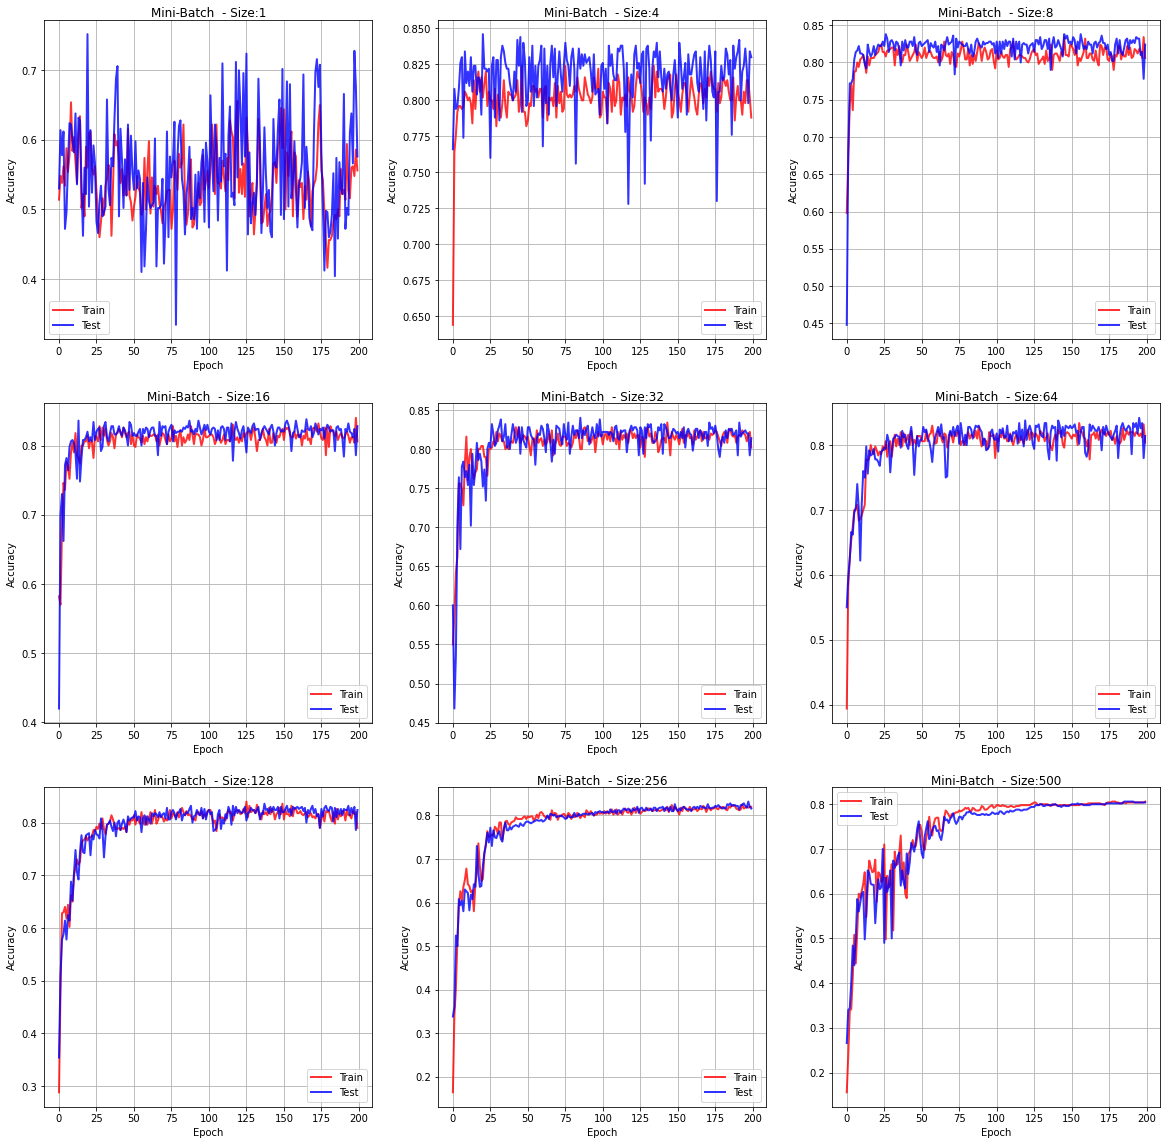

In [ ]:
index = 0
batch_sizes = [1, 4, 8, 16, 32, 64, 128, 256, 500]
fig, axes = plt.subplots(3, 3, figsize=(20, 20))
for i in range(3):
  for j in range(3):

    history = fit_model(X, y, batch_sizes[index])
    axes[i][j].plot(history.history['accuracy'], label='Train', c='r', linewidth=2, alpha=0.8)
    axes[i][j].plot(history.history['val_accuracy'], label='Test', c='b', linewidth=2, alpha=0.8)
    axes[i][j].set_xlabel('Epoch')
    axes[i][j].set_ylabel('Accuracy')
    axes[i][j].set_title(f'Mini-Batch  - Size:{batch_sizes[index]}', pad=-40)
    axes[i][j].legend()
    axes[i][j].grid()
    index += 1

plt.show()